In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from resnet import resnet
import cv2

# BIOMAG Machine Learning Workshop 1. - ResNet 50
## Load training/test data
We are going to use the CIFAR10 dataset, because the ImageNet is too large (100+ GB)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Images are low-res by default, so we are going to upscale then and only take a subset of them to reduce the memory needed.

In [3]:
x_train = list(x_train)
resize_fn = lambda x: cv2.resize(x, (224,224), interpolation=cv2.INTER_LINEAR)
x_train_resized = list(map(resize_fn, x_train))

x_train = np.array(x_train_resized[:5000])
y_train = y_train[:5000]


x_test = list(x_test)
x_test_resized = list(map(resize_fn, x_test))

x_test = np.array(x_test_resized[:1000])
y_test = y_test[:1000]

deer
(224, 224, 3)


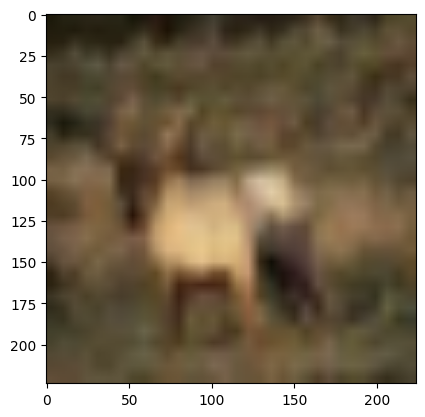

In [4]:
plt.imshow(x_train[3])
print(labels[int(y_train[3])])
print(x_train[3].shape)

### Create ResNet-50 model
First, create our own model with 10 classes.

In [5]:
model = resnet(input_size=(224,224,3), n_classes=10)
model.summary()

Let's see how different it is compared to the built-in one...

In [4]:
testmodel = keras.applications.resnet50.ResNet50(input_shape=(224,224,3), weights=None, classes=10)
print(testmodel.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Define optimizer and LR adjustment according to the article (SGD with 0.1 learning rate, momentum=0.9, divide LR by 10 each time the error plateaus).

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

### Training
For multi-class classification, we have to use sparse categorical crossentropy.

In [ ]:
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy")
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=20, callbacks=[reduce_lr])

In [6]:
testmodel.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy")
history = testmodel.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=20, epochs=20, callbacks=[reduce_lr])

Epoch 1/20
250/250 [==============================] - 57s 167ms/step - loss: 4.2254 - val_loss: 12.6217
Epoch 2/20
250/250 [==============================] - 41s 164ms/step - loss: 2.2400 - val_loss: 2.7304
Epoch 3/20
250/250 [==============================] - 41s 162ms/step - loss: 2.1547 - val_loss: 2.1265
Epoch 4/20
250/250 [==============================] - 43s 173ms/step - loss: 2.0725 - val_loss: 1.9944
Epoch 5/20
250/250 [==============================] - 42s 169ms/step - loss: 2.0343 - val_loss: 1.9608
Epoch 6/20
250/250 [==============================] - 42s 169ms/step - loss: 1.9294 - val_loss: 1.8812
Epoch 7/20
250/250 [==============================] - 44s 175ms/step - loss: 1.8592 - val_loss: 1.8968
Epoch 8/20
250/250 [==============================] - 42s 166ms/step - loss: 1.7912 - val_loss: 1.8714
Epoch 9/20
250/250 [==============================] - 44s 175ms/step - loss: 1.7581 - val_loss: 1.7802
Epoch 10/20
250/250 [==============================] - 43s 173ms/step - 

### Homework/additional tasks
* Try it out with biological data
* Try to play around with the parameters (nowadays, we have Adam optimizer, better weight initialization, etc)
* Currently, our architecture only supports (224,224,3)-shaped input images. There are some guidelines online how you can make it more flexible. Try to change the code so that it will support any resolution.